In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20250303132330481308/synthetic_text_data.csv'

In [5]:
df = pd.read_csv(url)
df.head()

,text,label
0,Artificial intelligence is advancing in health...,Technology
1,Football fans are excited about the upcoming W...,Sports
2,New policies regarding climate change have spa...,Politics
3,The latest blockbuster movie has shattered box...,Entertainment
4,Quantum computing promises to revolutionize in...,Technology


In [7]:
X = df['text']
y = df['label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [17]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


In [18]:
y_pred = model.predict(X_test_vec)

Accuracy : 88.23529411764706%


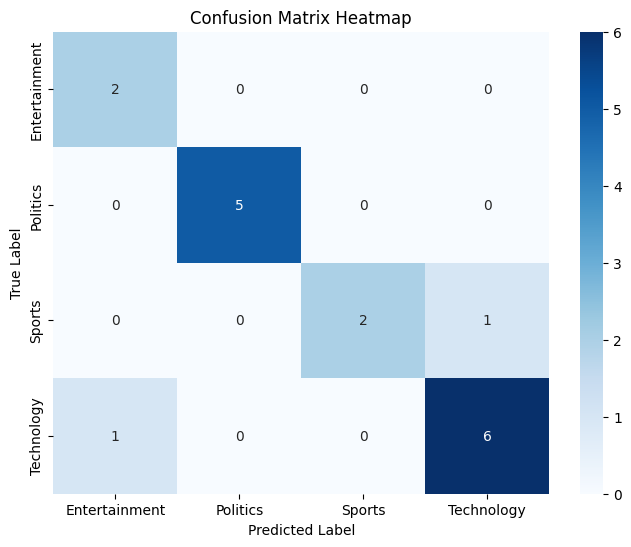

In [22]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy : {accuracy * 100}%')

class_labels = np.unique(y_test)

plt.figure(figsize = (8,6))
sns.heatmap(conf_matrix, annot = True, fmt='d',
cmap = 'Blues', xticklabels = class_labels,
yticklabels = class_labels)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [26]:
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score : {f1:.4f}')

F1 Score : 0.8824


In [31]:
user_input = ("I love artificial intelligence and machine learning")

user_input_vectorized = vectorizer.transform([user_input])
predicted_label = model.predict(user_input_vectorized)
print(f"The input text belongs to the '{predicted_label[0]}' category.")

The input text belongs to the 'Technology' category.


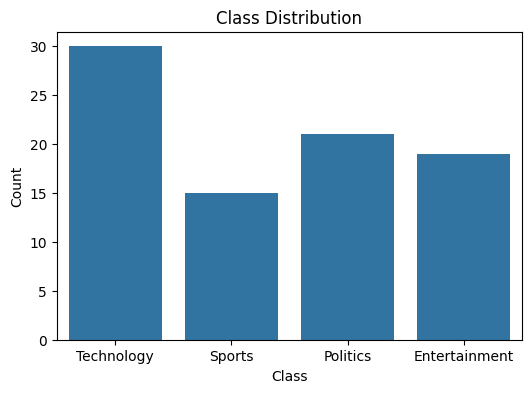

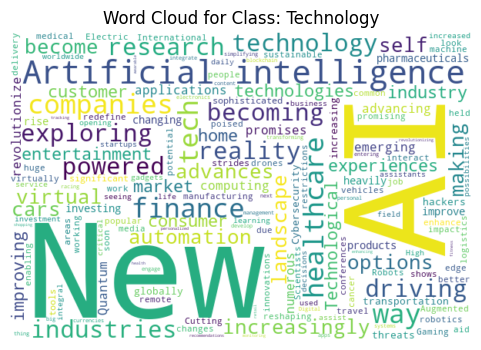

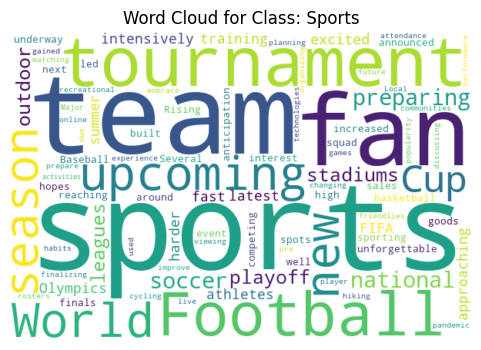

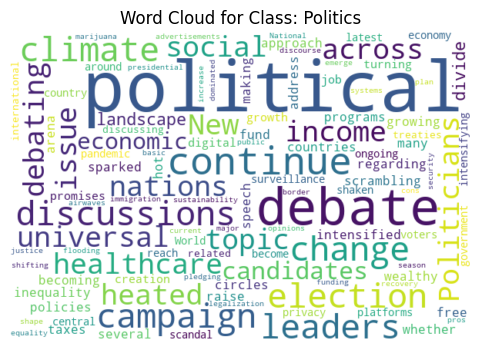

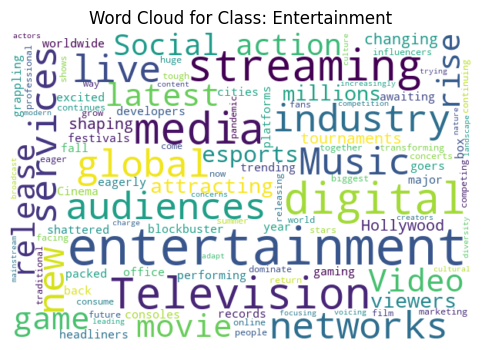

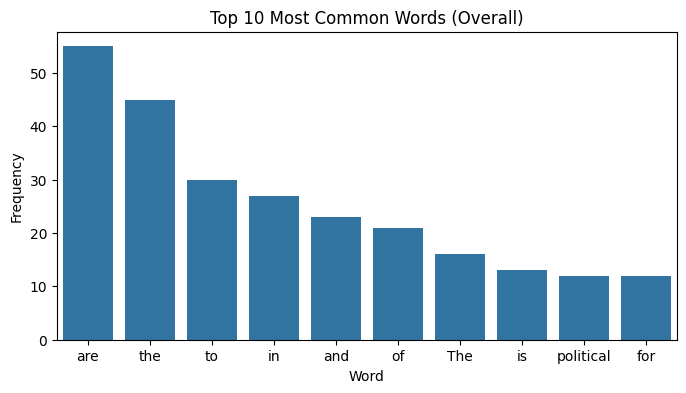

,Text,True Label,Predicted Label
78,National debates on the legalization of mariju...,Politics,Politics
0,Artificial intelligence is advancing in health...,Technology,Technology
68,"Self-driving cars are becoming a reality, with...",Technology,Technology
22,The debate on free speech continues to be a ho...,Politics,Politics
12,Video game developers are excited about the re...,Entertainment,Entertainment
82,Television networks are trying to adapt to the...,Entertainment,Entertainment
10,Cybersecurity threats are increasing as hacker...,Technology,Technology
18,Baseball teams are preparing for the playoffs ...,Sports,Sports
4,Quantum computing promises to revolutionize in...,Technology,Technology
66,Political leaders are pledging to increase fun...,Politics,Politics


Feature importance is not available for this model.


In [34]:
# 1. Class Distribution Bar Plot
plt.figure(figsize=(6,4))
sns.countplot(x=y)
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
# 2. Word Cloud for Each Class
from wordcloud import WordCloud
for label in df['label'].unique():
    text = ' '.join(df[df['label'] == label]['text'])
    wordcloud = WordCloud(width=600, height=400, background_color='white').generate(text)
    plt.figure(figsize=(7,4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Class: {label}')
    plt.show()
# 3. Top N Words Bar Plot (Overall)
from collections import Counter
all_words = ' '.join(df['text']).split()
most_common = Counter(all_words).most_common(10)
words, counts = zip(*most_common)
plt.figure(figsize=(8,4))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Common Words (Overall)')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()
# 4. Sample Predictions Table
sample_df = pd.DataFrame({'Text': X_test[:10], 'True Label': y_test[:10], 'Predicted Label': y_pred[:10]})
display(sample_df)
# 5. Feature Importance (Top Words per Class)
if hasattr(model, 'coef_'):
    feature_names = vectorizer.get_feature_names_out()
    for i, class_label in enumerate(model.classes_):
        top10 = np.argsort(model.coef_[i])[-10:]
        print(f"Top words for class '{class_label}':")
        for idx in top10:
            print(f"  {feature_names[idx]}")
        print('-'*30)
else:
    print('Feature importance is not available for this model.')